# Loudness

Loudness comparison according to the [ITU-R BS.1770-4](https://github.com/csteinmetz1/pyloudnorm) loudness algorithm implementation.

In [86]:
import sys
sys.path.append('..')

In [87]:
import warnings
warnings.simplefilter('ignore', RuntimeWarning)
warnings.simplefilter('ignore', UserWarning)

In [88]:
import IPython.display as display
import librosa
import matplotlib.pyplot as plot
import numpy as np

from philharmonia import dataframe, datafile

In [89]:
import pyloudnorm

meter = None

def loudness(sample):

    x, sr = librosa.load(datafile(sample.file), sr=None, mono=True)

    global meter
    meter = meter or pyloudnorm.Meter(sr, block_size=100e-3)

    db = meter.integrated_loudness(x)

    return int(db)

In [90]:
query = [
    "percussion==False",
    "note == 'C'",
    "style == 'normal'",
    "length == '1'",
]

filter = ['file', 'instrument', 'note', 'octave', 'dynamic', 'pitch']
sort = ['pitch', 'dynamic']

data = dataframe().query(' & '.join(query)).filter(filter).sort_values(sort)

data['loudness'] = data.apply(lambda sample: loudness(sample), axis=1)

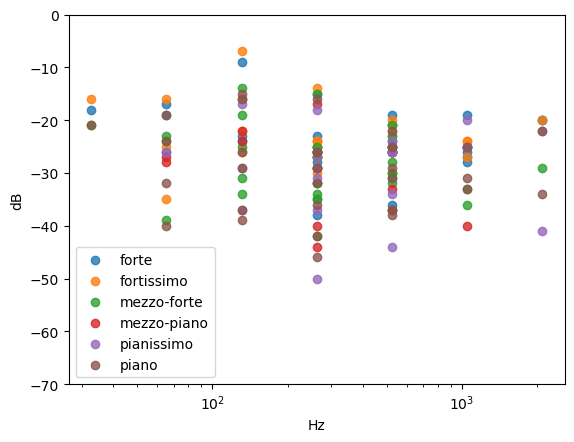

In [91]:
dynamics = {
    dynamic: {
        'pitch': data[data.dynamic == dynamic].pitch.tolist(),
        'loudness': data[data.dynamic == dynamic].loudness.tolist()
    }
    for dynamic in sorted(data.dynamic.unique())
}

for dynamic in dynamics:

    x = dynamics[dynamic]['pitch']
    y = dynamics[dynamic]['loudness']

    plot.scatter(x, y, label=dynamic, alpha=0.8)

plot.legend();
plot.xscale('log');
plot.xlabel('Hz');
plot.ylabel('dB');
plot.ylim(-70, 0);

In [92]:
display.HTML(data.to_html())

,file,instrument,note,octave,dynamic,pitch,loudness
7994,contrabassoon/contrabassoon_C1_1_forte_normal.mp3,contrabassoon,C,1.0,forte,32.70,-18
8166,contrabassoon/contrabassoon_C1_1_fortissimo_normal.mp3,contrabassoon,C,1.0,fortissimo,32.70,-16
8263,contrabassoon/contrabassoon_C1_1_mezzo-forte_normal.mp3,contrabassoon,C,1.0,mezzo-forte,32.70,-21
8191,contrabassoon/contrabassoon_C1_1_piano_normal.mp3,contrabassoon,C,1.0,piano,32.70,-21
4580,bassoon/bassoon_C2_1_forte_normal.mp3,bassoon,C,2.0,forte,65.41,-26
7914,contrabassoon/contrabassoon_C2_1_forte_normal.mp3,contrabassoon,C,2.0,forte,65.41,-19
10554,tuba/tuba_C2_1_forte_normal.mp3,tuba,C,2.0,forte,65.41,-17
4345,bassoon/bassoon_C2_1_fortissimo_normal.mp3,bassoon,C,2.0,fortissimo,65.41,-25
10593,tuba/tuba_C2_1_fortissimo_normal.mp3,tuba,C,2.0,fortissimo,65.41,-16
11742,french horn/french-horn_C2_1_fortissimo_normal.mp3,french-horn,C,2.0,fortissimo,65.41,-35
